In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Problem plecakowy

In [3]:
x_weight = [1, 3, 2, 2]
x_cost = [1, 2 , 1, 2]
max_weight = 5
y= np.arange(0,max_weight+1)


In [4]:
take_if = lambda y,w: 1 if y-w>=0 else 0
solution= np.zeros((len(y),len(x_weight)*2+1))
solution[:,0]=y
for i in range (len(x_weight)):
    
    n=len(x_weight)-i-1
    print(n)
    w = x_weight[n]
    
    if i != 0:
        fn_before = np.array([(solution[yn - w,1+2*(i-2)+1] if (yn - w>0 and 1+2*(i-2)+1 != 0)  else 0) for yn in y])
        fn_now = np.array([(solution[yn - w,1+2*(i-1)+1] if yn - w>0 else 0) for yn in y]) 
    else:
        fn_before = np.zeros(y.shape)
        fn_now = np.zeros(y.shape)
        
       
    x_n = np.array([take_if(y,w) for y in solution[:,0]])
    print(f'({x_cost[n]}*{x_n}+{fn_before},{fn_now}+{x_cost[n]}*{x_n})')
    f_n = np.maximum(x_cost[n]*x_n+fn_before,fn_now+x_cost[n]*x_n)
    print(fn_now,fn_before)
        
    solution[:,1+2*i]=x_n
    
    solution[:,1+2*i+1] = f_n
    for idx,f in enumerate(zip(solution[:,1+2*(i-1)+1],solution[:,1+2*i+1])):
        if i>0:
            if f[0]>=f[1]:
                c = f[0] 
                solution[idx,1+2*i+1]=c
                solution[idx,1+2*i] =  0
            
solution

3
(2*[0 0 1 1 1 1]+[0. 0. 0. 0. 0. 0.],[0. 0. 0. 0. 0. 0.]+2*[0 0 1 1 1 1])
[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.]
2
(1*[0 0 1 1 1 1]+[0 0 0 0 0 0],[0. 0. 0. 0. 2. 2.]+1*[0 0 1 1 1 1])
[0. 0. 0. 0. 2. 2.] [0 0 0 0 0 0]
1
(2*[0 0 0 1 1 1]+[0. 0. 0. 0. 0. 2.],[0. 0. 0. 0. 0. 2.]+2*[0 0 0 1 1 1])
[0. 0. 0. 0. 0. 2.] [0. 0. 0. 0. 0. 2.]
0
(1*[0 1 1 1 1 1]+[0. 0. 0. 2. 2. 3.],[0. 0. 0. 2. 2. 3.]+1*[0 1 1 1 1 1])
[0. 0. 0. 2. 2. 3.] [0. 0. 0. 2. 2. 3.]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [2., 1., 2., 0., 2., 0., 2., 0., 2.],
       [3., 1., 2., 0., 2., 0., 2., 1., 3.],
       [4., 1., 2., 1., 3., 0., 3., 0., 3.],
       [5., 1., 2., 1., 3., 1., 4., 0., 4.]])

In [5]:
sol = f'cost= {np.max(solution[:,-1])} ' 
yn = int(np.argmax(solution[:,-1]))
print(yn)

for i in range (len(x_weight)):
    n=len(x_weight)-i-1
    #print(n)
    w = x_weight[n]
    #print(f'{w}*{solution[yn,1+n*2]}')
    #print(yn)
    sol+=f' x{i+1}:{solution[yn, 1+2*n]} '
    yn-=w*int(solution[yn,1+n*2])
print(sol) 

5
cost= 4.0  x1:0.0  x2:1.0  x3:0.0  x4:1.0 


### Zagadnienie dostawcy

In [7]:
# cost_matrix = np.array([[2,3,7,8,15,16,17],
#                         [3,5,8,9,np.inf,np.inf,np.inf],
#                         [0,5,9,10,12,16,np.inf]])
                       
px = np.array([[2,5,7,9,12,15],
               [0,4,6,9,13,16],
               [1,5,8,10,12,14],
               [0,5,9,11,13,16]])
tx = np.array([[0,1,1,3,3,3],
               [1,2,2,3,3,4],
               [2,2,2,2,2,2],
               [0,2,3,4,5,6]
              ])
cost_matrix = px+tx

nr_steps = cost_matrix.shape[0]
y_last=8
y_first=0
solution = np.zeros((y_last+1,nr_steps*2+1))
yn = [i for i in range(y_last+1)]
solution[:,0] = yn
for step in range(nr_steps):
    n = nr_steps-step-1
    for y in yn:
            allowed_actions = []
            if n==nr_steps-1:
                for x in range(cost_matrix.shape[1]):
                    if x+y==y_last:
                        allowed_actions.append([x,cost_matrix[n,x]])

                pass
            elif n == 0:
                for x in range(cost_matrix.shape[1]):
                    if y <= y_first:
                        allowed_actions.append([x,cost_matrix[n,x]+solution[x,-3]])

                pass
            else:
                for x in range(cost_matrix.shape[1]):
                    if y_first <= (x+y) <= y_last:
                        allowed_actions.append([x,cost_matrix[n,x]+solution[y+x,(step-1)*2+1+1]])

                pass
            solution[y,step*2+1:step*2+3]=min(allowed_actions,key=lambda x: x[1]) if len(allowed_actions)>0 else [None,np.inf]
                       
print(solution)
path = []
sol_y = 0
best_score = solution[0,-2:]
path.append(best_score)
for i in range(nr_steps-1):
    n = nr_steps - 2 - i
    sol_y+=best_score[0]
    best_score = solution[int(sol_y),n*2+1:n*2+3]
    path.append(best_score)
print('Rozwizanie:', [list(x) for x in path])
print('Koszt: ', path[0][1] )


[[ 0. nan inf  5. 31.  3. 28.  3. 29.]
 [ 1. nan inf  5. 28.  2. 24. nan inf]
 [ 2. nan inf  5. 23.  1. 22. nan inf]
 [ 3.  5. 22.  5. 16.  0. 17. nan inf]
 [ 4.  4. 18.  4. 14.  0. 15. nan inf]
 [ 5.  3. 15.  3. 12.  0. 13. nan inf]
 [ 6.  2. 12.  2. 10.  0. 11. nan inf]
 [ 7.  1.  7.  1.  7.  0.  8. nan inf]
 [ 8.  0.  0.  0.  3.  0.  4. nan inf]]
Rozwizanie: [[3.0, 29.0], [0.0, 17.0], [5.0, 16.0], [0.0, 0.0]]
Koszt:  29.0


### Przydział partii

In [11]:
storage_cost = 2
products_out = q =  3
storage_max = 4
production_max = 5
nr_months = 4
g = [0, 15, 18, 19, 20, 24]
def get_x_range (yn,x):
    if x == 0:
        x_min = -yn+products_out if -yn+products_out>=0 else None
        x_max = x_min
    elif x == nr_months-1:
        x_min = products_out+yn if products_out+yn <=5 else None
        x_max = x_min
    else:
        
        x_min = products_out-yn if products_out-yn>=0 else 0
        x_max = storage_max-yn+products_out if storage_max-yn+products_out<=4 else 5
    return x_min,x_max
        

In [12]:
get_x_range(3,3)

(None, None)

In [13]:
yn = np.arange(storage_max+1)
yn

array([0, 1, 2, 3, 4])

In [14]:
solution = np.zeros((storage_max+1,nr_months*2+1))
solution[:,0] = yn

In [15]:
for i in range(nr_months):
    if i != 0 and i != nr_months-1:
        for ixd,y in enumerate(solution[:,0].astype(int)) :
            x_min,x_max = get_x_range(y,i)
            
            production = []
            index =[]
            for x in range(x_min,x_max+1):
                
                fn_before = solution[y - q + x, 1 + 2 * (i - 1)+1]
                gx = g[x]
                y_left = y + x - q
                cost = y_left * storage_cost
                production.append(gx+cost+fn_before)
                index.append(x)    
            solution[ixd, 1 + 2 * i+1] = min(production)
            solution[ixd, 1 + 2 * i] = index[np.argmin(production)]
    else:
            for ixd,y in enumerate(solution[:,0].astype(int)) :
                x = get_x_range(y,i)[1]
                
                if x is not None:
                    fn_before = solution[y, 1 + 2 * (i - 1)+1] if i == nr_months-1 else 0  
                    gx = g[x] 
                    y_left = y if i == nr_months-1 else 0
                    cost = y_left * storage_cost
                    solution[ixd, 1 + 2 * i+1] = gx+cost+fn_before
                    print(f'{fn_before}+{cost}+{gx}={solution[ixd, 1 + 2 * i+1]}')
                else:
                    solution[ixd, 1 + 2 * i+1] = np.inf
                solution[ixd, 1 + 2 * i] = x
        
        
solution

0+0+19=19.0
0+0+18=18.0
0+0+15=15.0
0+0+0=0.0
52.0+0+19=71.0
49.0+2+20=71.0
45.0+4+24=73.0


array([[ 0.,  3., 19.,  3., 38.,  4., 52.,  3., 71.],
       [ 1.,  2., 18.,  5., 30.,  5., 49.,  4., 71.],
       [ 2.,  1., 15.,  4., 26.,  4., 45.,  5., 73.],
       [ 3.,  0.,  0.,  0., 19.,  0., 38., nan, inf],
       [ 4., nan, inf,  0., 20.,  0., 32., nan, inf]])

In [16]:
path = []
for y in np.where(solution[:,-1] == solution[:,-1].min())[0]:
    steps = []
    
    steps.append((solution[y,(nr_months-1)*2+1],solution[y,(nr_months-1)*2+1+1]))
    xn = solution[y,(nr_months-1)*2+1]
    yn = xn-products_out
    
    for i in range(1,nr_months):
        n = nr_months-1-i
        steps.append((solution[int(yn),n*2+1],solution[int(yn),n*2+1+1]))
        xn = solution[int(yn),(n)*2+1]
        yn = (yn-q+xn)
    print(f'wynik dla {steps[0]}')
    print(steps)      

wynik dla (3.0, 71.0)
[(3.0, 71.0), (4.0, 52.0), (5.0, 30.0), (0.0, 0.0)]
wynik dla (4.0, 71.0)
[(4.0, 71.0), (5.0, 49.0), (0.0, 19.0), (3.0, 19.0)]


### nieliniowe zagadnienie przydziału

In [17]:
nr_months = 5
prod_max =5
y_max = 4
y_min = 1
q = [2, 3,3,2,3]
h = [np.inf,1,5,6,3,7]
g = [0,11,14,15,16,17]
first_y = 2
last_y = 3
production_max = 5
def get_x_range(yn, i):
    if i not in [0,nr_months-1]:
        x_min = y_min+q[i]-yn if 0<=y_min+q[i]-yn<= prod_max else 0
        x_max = q[i]+y_max-yn if 0<=q[i]+y_max-yn<= prod_max else prod_max
        
        if x_min is None:
            x_max =x_min 
        if x_max is None:
            x_min=x_max 
    elif i ==0 :
        x_max = yn+q[i]-first_y if 0<=yn+q[i]-first_y<=prod_max else None
        x_min = x_max
    else:
        x_max = -yn+q[i]+last_y if yn>=y_min  else None
        x_min = x_max
    return x_min,x_max

In [18]:
get_x_range(3,nr_months-1)

(3, 3)

In [19]:
solution = np.zeros((y_max+1,1+2*nr_months))
solution[:,0] = range(y_max+1) 
yn = solution[:,0].astype(int)
for n in range(nr_months):
    i = nr_months-1-n
    
    
    for y in yn:
        
        x_range = get_x_range(y,i)
        
        best_score = np.inf
        best_x = 0
        if y_min <= y <=y_max:
            if i != 0:
                if x_range[0] != None:
                    if x_range[0]==x_range[1]:
                        x = x_range[0]

                        fn = (solution[y+x-q[i],1+2*(n-1)+1] if i<nr_months-1 else 0) #if y+x-q[i]<=nr_months else np.inf

                        score = fn+g[x]+h[y+x-q[i]] #if y+x-q[i]<=nr_months else np.inf

                        solution[y,1+2*n+1] = score if x >=0 else np.inf
                        solution[y,1+2*n] = x  if x >=0 else None
                    else:    
                        for x in range(x_range[0],x_range[1]+1):

                            fn = (solution[y+x-q[i],1+2*(n-1)+1] if i<nr_months-1 else 0) #if y+x-q[i]<=nr_months else np.inf
                            score = fn+g[x]+h[y+x-q[i]] #if y+x-q[i]<=nr_months else np.inf

                            if score< best_score:
                                best_score = score
                                best_x = x
                        solution[y,1+2*n+1] = best_score
                        solution[y,1+2*n] = best_x

                else:
                    solution[y,1+2*n+1] = np.inf
                    solution[y,1+2*n] = None
            else:
                if y==first_y:
                    if x_range[0] != None:
                        if x_range[0]==x_range[1]:
                            x = x_range[0]

                            fn = (solution[first_y+x-q[i],1+2*(n-1)+1] if i<=nr_months-1 else 0) if first_y+x-q[i] >= y_min else np.inf

                            score = fn+g[x]+h[first_y+x-q[i]] if first_y+x-q[i]>= y_min else np.inf

                            solution[y,1+2*n+1] = score
                            solution[y,1+2*n] = x
                        else:    
                            for x in range(x_range[0],x_range[1]+1):

                                fn = solution[first_y+x-q[i],1+2*(n-1)+1] if first_y+x-q[i]>=y_min else np.inf
                                score = fn+g[x]+h[first_y+x-q[i]] #if first_y+x-q[i]<=nr_months else np.inf
                                
                                if score< best_score:
                                    best_score = score
                                    best_x = x
                            solution[y,1+2*n+1] = best_score
                            solution[y,1+2*n] = best_x

                else:
                    solution[y,1+2*n+1] = np.inf
                    solution[y,1+2*n] = None

        else:
            solution[y,1+2*n+1] = np.inf
            solution[y,1+2*n] = None
        
          
solution

array([[ 0., nan, inf, nan, inf, nan, inf, nan, inf, nan, inf],
       [ 1.,  5., 23.,  2., 38.,  5., 47.,  3., 63., nan, inf],
       [ 2.,  4., 22.,  1., 35.,  4., 46.,  5., 59.,  2., 78.],
       [ 3.,  3., 21.,  0., 24.,  3., 45.,  4., 58., nan, inf],
       [ 4.,  2., 20.,  0., 27.,  0., 39.,  0., 48., nan, inf]])

In [20]:
path = []
for y in np.where(solution[:,-1] == solution[:,-1].min())[0]:
    print(y)
    steps = []
    
    steps.append((solution[y,(nr_months-1)*2+1],solution[y,(nr_months-1)*2+1+1]))
    xn = solution[y,(nr_months-1)*2+1]
    yn = y+xn-q[0]
    print(xn,yn)
    for i in range(1,nr_months):
        n = nr_months-1-i
        steps.append((solution[int(yn),n*2+1],solution[int(yn),n*2+1+1]))
        xn = solution[int(yn),(n)*2+1]
        yn = (yn-q[i]+xn)
    print(f'wynik dla {steps[0]}')
    print(steps)   

2
2.0 2.0
wynik dla (2.0, 78.0)
[(2.0, 78.0), (5.0, 59.0), (0.0, 39.0), (2.0, 38.0), (5.0, 23.0)]


## Little

In [44]:
def reduce(matrix):
    operation_matrix  = np.zeros((matrix.shape[0]+1,matrix.shape[1]+1))
    operation_matrix[:matrix.shape[0],:matrix.shape[1]] = matrix
    row_reduction=[]
    column_reduction = []
    for row in range(len(matrix)):
        minima = matrix[row,:].min()
        row_reduction.append(minima)
        if minima<np.inf:
            matrix[row,:] -= [minima for i in range(len(matrix))] 
    for column in range(matrix.shape[1]):
        minima = matrix[:,column].min()
        column_reduction.append(minima)
        if minima<np.inf:
            matrix[:, column] -=[minima for i in range(len(matrix))] 
    
    operation_matrix[:-1,-1] = row_reduction
    operation_matrix[-1,:-1] = column_reduction
    print('OPERATION REDUCTION\n',operation_matrix)
    print('MATRIX AFTER REDUCTION\n',matrix)
    return  sum(np.array(column_reduction)[np.array(column_reduction)<np.inf])+sum(np.array(row_reduction)[np.array(row_reduction)<np.inf])
    
        
    

In [66]:
def permit(matrix,i,size):
    print(matrix)
    reduction =[]
    for row in range(len(matrix)):
        r = matrix[row,:]
        minima = r[r!=0].min() if len(r[r==0])<2 or r[r!=0].min() == np.inf else 0
        if minima == np.inf and 0 in r:
            minima = 0
        reduction.append(minima)
    for column in range(matrix.shape[1]):
        c= matrix[:,column]
        minima = c[c!=0].min() if len(c[c==0])<2 or c[c!=0].min()== np.inf  else 0
        if minima == np.inf and 0  in c:
            minima = 0
        reduction.append(minima)
    
    reduction = np.array(reduction)
    minimum = max(reduction[reduction<np.inf])
    print()
    print('MINIMUM:',minimum)
    print()
    to_reduce = np.argwhere(reduction==minimum)[0,0] 
    
    if i<size-2:
        reduction_index = [0,0]
        if to_reduce>=len(reduction)//2:
            to_reduce-=len(reduction)//2
            reduction_index[1]=to_reduce
            for i,x in enumerate(matrix[:,to_reduce]):
                if x==0:
                    reduction_index[0] = i
        else:
            reduction_index[0] = to_reduce
            for i,x in enumerate(matrix[to_reduce,:]):
                if x==0:
                    reduction_index[1] = i
        operation_matrix  = np.zeros((matrix.shape[0]+1,matrix.shape[1]+1))
        operation_matrix[:matrix.shape[0],:matrix.shape[1]] = matrix
        operation_matrix[:-1,-1] = reduction[:len(reduction)//2]
        operation_matrix[-1,:-1] = reduction[len(reduction)//2:]
        print('OPERATION MATRIX PERMITION\n',operation_matrix)
        matrix[:,reduction_index[1]] = [np.inf for i in range(len(matrix))]   
        matrix[reduction_index[0],:] = [np.inf for i in range(len(matrix))] 
    
        matrix[reduction_index[1],reduction_index[0]] = np.inf
    
        print('MATRIX AFTER PERMISSION')
        print(matrix)
        
        print('SELECTED INDEX: ', reduction_index)
    else:
        
        reduction_index=[]
        for j,row in enumerate(matrix):
            for k,col in enumerate(row):
                if i == size-2:
                    if 0<col<np.inf:
                        reduction_index.append([j,k])
                else:
                    if col<np.inf:
                        reduction_index.append([j,k])
        reduction_index = reduction_index[0]
        operation_matrix  = np.zeros((matrix.shape[0]+1,matrix.shape[1]+1))
        operation_matrix[:matrix.shape[0],:matrix.shape[1]] = matrix
        operation_matrix[:-1,-1] = reduction[:len(reduction)//2]
        operation_matrix[-1,:-1] = reduction[len(reduction)//2:]
        print('OPERATION MATRIX PERMITION\n',operation_matrix)
         
        matrix[reduction_index[0],:] = [np.inf for i in range(len(matrix))] 
    
        #matrix[reduction_index[1],reduction_index[0]] = np.inf
    
        print('MATRIX AFTER PERMISSION')
        print(matrix)
        
        print('SELECTED INDEX: ', reduction_index)
    
    
    
    return reduction, minimum if minimum < np.inf else 0,reduction_index
    
    
        

In [67]:
M =     np.array([[np.inf, 3, 2, 5,9,4],
                 [1, np.inf, 3,6,7, 9],
                 [6, 2,np.inf,5,4,9],
                 [9,7,6,np.inf,6,4],
                 [7,4,5,3,np.inf,7],
                 [6,5,3,4,1,np.inf]])
print(M)
def Little(M):
    o = 0
    path=[]
    for i in range(len(M)):
        
        print('ITERATION:',i)
        if i<len(M)-1:
            o+=reduce(M)
        print('PHI after reduction:',o)
        _, minimum,reduction_index = permit(M,i,len(M))
        o+=minimum
        path.append(reduction_index)
        print('PHI after selection:',o,'\n\n')
    print(path)
    sorted_path = []
    for i in range(len(path)):
        if i == 0:
            sorted_path.append(path[0])
            path.remove(path[0])
        else:
            for x in path:
                if x[0]==sorted_path[-1][1]:
                    sorted_path.append(x)
                    path.remove(x)
    print('SORTED PATH:\n',sorted_path)
Little(M)

[[inf  3.  2.  5.  9.  4.]
 [ 1. inf  3.  6.  7.  9.]
 [ 6.  2. inf  5.  4.  9.]
 [ 9.  7.  6. inf  6.  4.]
 [ 7.  4.  5.  3. inf  7.]
 [ 6.  5.  3.  4.  1. inf]]
ITERATION: 0
OPERATION REDUCTION
 [[inf  3.  2.  5.  9.  4.  2.]
 [ 1. inf  3.  6.  7.  9.  1.]
 [ 6.  2. inf  5.  4.  9.  2.]
 [ 9.  7.  6. inf  6.  4.  4.]
 [ 7.  4.  5.  3. inf  7.  3.]
 [ 6.  5.  3.  4.  1. inf  1.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
MATRIX AFTER REDUCTION
 [[inf  1.  0.  3.  7.  2.]
 [ 0. inf  2.  5.  6.  8.]
 [ 4.  0. inf  3.  2.  7.]
 [ 5.  3.  2. inf  2.  0.]
 [ 4.  1.  2.  0. inf  4.]
 [ 5.  4.  2.  3.  0. inf]]
PHI after reduction: 13.0
[[inf  1.  0.  3.  7.  2.]
 [ 0. inf  2.  5.  6.  8.]
 [ 4.  0. inf  3.  2.  7.]
 [ 5.  3.  2. inf  2.  0.]
 [ 4.  1.  2.  0. inf  4.]
 [ 5.  4.  2.  3.  0. inf]]

MINIMUM: 4.0

OPERATION MATRIX PERMITION
 [[inf  1.  0.  3.  7.  2.  1.]
 [ 0. inf  2.  5.  6.  8.  2.]
 [ 4.  0. inf  3.  2.  7.  2.]
 [ 5.  3.  2. inf  2.  0.  2.]
 [ 4.  1.  2.  0. inf  4.  1.]
 [ 5.  4.  

## Dijkstra

Poprzednicy:
{0: 0, 1: 0, 2: 3, 3: 0, 4: 3},

v[g]: {0: 0, 1: 3.0, 2: 3.0, 3: 1.0, 4: 2.0}
phi: 9.0


7.0

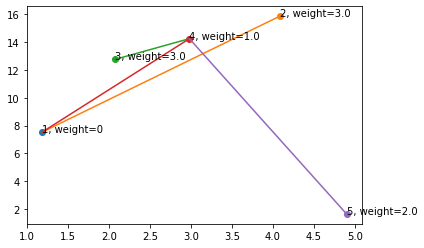

In [71]:
def get_dijkstra_path (matrix):
    weight_list = {i:np.inf for i in range(len(matrix))}
    ancestors={i:None for i in range(len(matrix))}
    ancestors[0] = 0
    weight_list[0] = 0
    
    for i,v in enumerate(matrix):
        for j,neighbor in enumerate(v):
            if neighbor<np.inf:
                if weight_list[j]>=weight_list[i]+neighbor:
                    weight_list[j]=weight_list[i]+neighbor
                    ancestors[j] = i
    print(f'Poprzednicy:\n{ancestors},\n\nv[g]: {weight_list}')
    print(f'phi: {sum([x for _,x in weight_list.items()])}')
    return ancestors, weight_list
import random
import math
import matplotlib.pyplot as plt
def generate_random_on_cilrcle():
    # radius of the circle
    circle_r = 10
    # center of the circle (x, y)
    circle_x = 5
    circle_y = 7

    # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    u = random.random() + random.random()
    r = circle_r * (2 - u if u > 1 else u)
    # calculating coordinates
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    return x,y
# #draw_points_with_connections
# ancestors, weights = get_dijkstra_path(M)
# fig = plt.figure()
# points={}
# for k in ancestors.keys():
#     points[k]=generate_random_on_cilrcle()
#     plt.scatter(points[k][0],points[k][1])
#     plt.annotate(k+1,points[k])
# for k,v in ancestors.items():
#     plt.plot([points[k][0],points[v][0]],[points[k][1],points[v][1]])
def dijkstra_visualize(M):
    ancestors, weights = get_dijkstra_path(M)
    fig = plt.figure()
    points={}
    for k in ancestors.keys():
        points[k]=generate_random_on_cilrcle()
        plt.scatter(points[k][0],points[k][1])
        plt.annotate(f'{k+1}, weight={weights[k]}',points[k])
    for k,v in ancestors.items():
        plt.plot([points[k][0],points[v][0]],[points[k][1],points[v][1]])
    return sum([M[i,j] if M[i,j]<np.inf else 0 for i,j in ancestors.items()])

from copy import deepcopy
def permit_edges(matrix,edges):
    M = deepcopy(matrix)
    for e in edges:
        M[e[0]-1,e[1]-1] = np.inf
        M[e[1]-1,e[0]-1] = np.inf
    return M
M = np.array([[np.inf,3,3,1,3],
              [3,np.inf,4,np.inf,3],
              [3,4,np.inf,2,3],
              [1,np.inf,2,np.inf,1],
              [3,3,3,1,np.inf]]).astype(float)
dijkstra_visualize(M)   


Poprzednicy:
{0: 0, 1: 4, 2: 0, 3: 0, 4: 3},

v[g]: {0: 0, 1: 5.0, 2: 3.0, 3: 1.0, 4: 2.0}
phi: 11.0


8.0

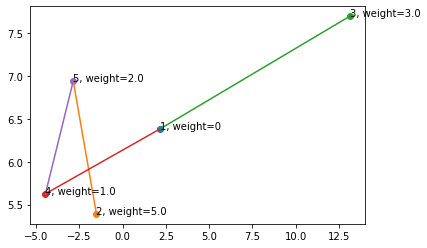

In [72]:
#tutaj zabronienia w indeksach naturalnych od 1 
dijkstra_visualize(permit_edges(M,[(1,2),(4,3)]))


### Podział i ograniczenia

In [26]:

M = np.array([[np.inf,3,2,5,9,4],
              [1,np.inf,3,6,7,9],
              [6,2,np.inf,5,4,9],
              [9,7,6,np.inf,6,4],
              [7,4,5,3,np.inf,7],
              [6,5,3,4,1,np.inf]])

[[inf  3. inf inf  9.  4.]
 [ 1. inf  3. inf  7.  9.]
 [inf  2. inf  5.  4.  9.]
 [inf inf  6. inf  6. inf]
 [ 7.  4.  5.  3. inf  7.]
 [ 6.  5.  3. inf  1. inf]]
Poprzednicy:
{0: 0, 1: 0, 2: 1, 3: 2, 4: 5, 5: 0},

v[g]: {0: 0, 1: 3.0, 2: 6.0, 3: 11.0, 4: 5.0, 5: 4.0}
phi: 29.0


22.0

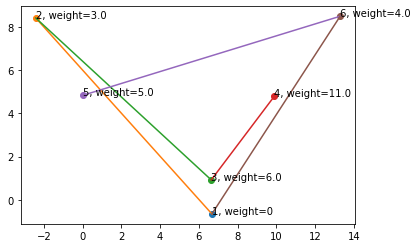

In [27]:
M = np.array([[np.inf,3,2,5,9,4],
              [1,np.inf,3,6,7,9],
              [6,2,np.inf,5,4,9],
              [9,7,6,np.inf,6,4],
              [7,4,5,3,np.inf,7],
              [6,5,3,4,1,np.inf]])
matrix = permit_edges(M,[(1,3),(1,4),(6,4),(2,4)])
print(matrix)
dijkstra_visualize(matrix)

### HOROWITZ

In [28]:

def horowitz_sahni(p, w, e, N, c):
    
    if N == 0:
        return 0, 0, []
        
    mask = [0] * N
    best_solution_mask = mask[:]
    
    value = best_solution_value = 0
    weight = best_solution_weight = 0
    size = best_solution_size = 0
    s=0
    j = 0
    while True:
        while j < N:
            
            print('step 3 Try a forward move', f'X={mask},z= {value},i={j},s = {s}')
            pos = j
            
            initial_value = value
            initial_heigh = weight
            initial_size = size
            
            while pos < N:
                
                #First tries a forward move, if possible
                if w[pos] > c - weight:
                    s = pos-1
                    print('Step 2', f'X={mask},z= {value},i={j},s = {s}')
                    break
                else:
                    print('Step 3', f'X={mask},z= {value},i={j},s = {s}')
                    size += 1
                    mask[pos] = 1
                    value += p[pos]
                    weight += w[pos]
                    pos += 1

            if pos >= N:
                #Completed one "depth first search" visit in the solution 
                #space tree: now must break off the while cycle
                break
            print('Step 2', f'X={mask},z= {value},i={j},s = {s}')
            upper_bound = value + (int)(e[pos] * (c - weight))
            
            if upper_bound < best_solution_value:
                #The forward move would not led us to a better solution,
                #so it performs backtracking

                #Brings the situation back at before the forward move
                for k in range(j,N):
                    mask[k] = 0
                
                value = initial_value 
                weight = initial_heigh
                size = initial_size

                print('Step 5 Looks for a possible backtracking move',f'X={mask},z= {value},i={j},s = {s}')
                pos = j - 1
                while True:
                    try:
                        while mask[pos] == 0:
                            pos -= 1
                    except IndexError:
                        #pos < 0: No more backtracking possible
                        return best_solution_value, best_solution_weight, best_solution_mask
                    else:
                        #Exclude the element from the knapsack
                        mask[pos] = 0
                        size -= 1
                        
                        value -= p[pos]
                        weight -= w[pos]
                        j = pos + 1

                        #Computes the upper bound on the score (According to the elements
                        #that can be added to the knapsack)
                        bound_height = weight
                        value_bound = 0
                        for i in range(j, N):
                            if w[i] > c - bound_height:
                                break
                            
                            value_bound += p[i]
                            bound_height += w[i]
                        
                        try:
                            value_bound += (int)(e[i] * (c - bound_height))
                        except IndexError:
                            pass
                            
                        upper_bound = value + value_bound
                        
                        if upper_bound > best_solution_value:
                            break               
            else:
                print('Step 3',f'X={mask},z= {value},i={j},s = {s}')
                #The forward move was successful: discards the next element
                #(which couldn't have been added because violates the
                #knapsack capacity) and tries to perform more f. moves.
                j = pos + 1
                
        #INVARIANT: j == N:
        print('Step 4',f'X={mask},z= {value},i={j},s = {s}')
        #Completed one "depth first search" visit in the solution space tree.
        if value > best_solution_value:
            #Checks current solution
            best_solution_mask = mask[:]
            best_solution_size = size
            best_solution_weight = weight
            best_solution_value = value
            
            if best_solution_size == N: #best_solution_value == U or 
                return best_solution_value, best_solution_weight, best_solution_mask
        
        try:   
            if mask[N-1] == 1:
                mask[N-1] = 0
                size -= 1               
                value -= p[N-1]
                weight -= w[N-1]
        except IndexError:
            pass
        print('Step 5', f'X={mask},z= {value},i={j},s = {s}')
        #Tries a backtracking move
        pos = N - 2
        while True:
            try:
                while mask[pos] == 0:
                    pos -= 1
            except IndexError:
                #pos < 0: No more backtracking possible
                return best_solution_value, best_solution_weight, best_solution_mask
            else:
                #Exclude the element from the knapsack
                mask[pos] = 0
                size -= 1
                value -= p[pos]
                weight -= w[pos]
                j = pos + 1
                print('Step 2', f'X={mask},z= {value},i={j},s = {s}')
                #Computes the upper bound on the score (According to the elements
                #that can be added to the knapsack)
                bound_height = weight
                value_bound = 0
                for i in range(j, N):
                    if w[i] > c - bound_height:
                        break
                    
                    value_bound += p[i]
                    bound_height += w[i]
                
                try: #if i < N:
                    value_bound += (int)(e[i] * (c - bound_height))
                except IndexError:
                    pass
                    
                upper_bound = value + value_bound
                
                if upper_bound > best_solution_value:
                    break

In [29]:
n = 4
X = [0]*n
X_star = [0]*n
i = 0
v_star = 0
z = 0
s = 0
phi = 0

k = []
maximize_function = [1,3,2,2]
constraint = [1,4,3,3,7]
c = constraint[-1]
constraint = constraint[:-1]
 
dtype  = [('index',int),('cj_aj',float),('cj', float),('aj',float)]

e = list(np.array(maximize_function)/np.array(constraint))
'''
 @param p:   List of elements' values;
    @param w:   List of elements' weights;
    @param e:   List of elements' scaled values: e[i] = p[i]/w[i]
                The elements available are sorted according to the 'e' vector.
                The i-th element has value p[i], weight w[i].
    @param N:   The number of elements available;
    @param c:   Total capacity of the knapsack;
    @return:    A tuple with 3 elements:
                1)    The best value found for the knapsack (the solution
                      of the problem);
                2)    The total weight of the solution;
                3)    A bitmask identifying the elements belonging to the
                      solution.
'''
horowitz_sahni(maximize_function,constraint,e,n,c)

step 3 Try a forward move X=[0, 0, 0, 0],z= 0,i=0,s = 0
Step 3 X=[0, 0, 0, 0],z= 0,i=0,s = 0
Step 3 X=[1, 0, 0, 0],z= 1,i=0,s = 0
Step 2 X=[1, 1, 0, 0],z= 4,i=0,s = 1
Step 2 X=[1, 1, 0, 0],z= 4,i=0,s = 1
Step 3 X=[1, 1, 0, 0],z= 4,i=0,s = 1
step 3 Try a forward move X=[1, 1, 0, 0],z= 4,i=3,s = 1
Step 2 X=[1, 1, 0, 0],z= 4,i=3,s = 2
Step 2 X=[1, 1, 0, 0],z= 4,i=3,s = 2
Step 3 X=[1, 1, 0, 0],z= 4,i=3,s = 2
Step 4 X=[1, 1, 0, 0],z= 4,i=4,s = 2
Step 5 X=[1, 1, 0, 0],z= 4,i=4,s = 2
Step 2 X=[1, 0, 0, 0],z= 1,i=2,s = 2
step 3 Try a forward move X=[1, 0, 0, 0],z= 1,i=2,s = 2
Step 3 X=[1, 0, 0, 0],z= 1,i=2,s = 2
Step 3 X=[1, 0, 1, 0],z= 3,i=2,s = 2
Step 4 X=[1, 0, 1, 1],z= 5,i=2,s = 2
Step 5 X=[1, 0, 1, 0],z= 3,i=2,s = 2
Step 2 X=[1, 0, 0, 0],z= 1,i=3,s = 2
Step 2 X=[0, 0, 0, 0],z= 0,i=1,s = 2


(5, 7, [1, 0, 1, 1])

### CPM

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

def call_CMP(M):
    edges = []
    for i, row in enumerate(M):
        for j,col in enumerate(row):
            if col>0:
                edges.append([i+1,j+1])
    print('Problem startowy:')
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    plt.figure()    
    nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
    node_size=500,node_color='pink',alpha=0.9,\
    labels={node:node for node in G.nodes()})
    nx.draw_networkx_edge_labels(G,pos,edge_labels={tuple(e):f'{M[e[0]-1][e[1]-1]:0.2f}' for e in edges},font_color='red')
    plt.axis('off')
    plt.show()
    print('Obliczanie dolnego ograniczenia t:')
    t_low = {i:0 for i in range(len(M))}

    for i in range(len(M)):

        print(f't_low{i+1} = max(')
        for j,n in enumerate(M[:,i]):
            if n>0:
                print(f'     t{j+1}+{n}={t_low[j]}+{n},')


                if t_low[j]+n>t_low[i]:
                    t_low[i] = t_low[j]+n
        print(f') = {t_low[i]}')
    print([f'{k+1}:{v}' for k,v in t_low.items()]) 
    
    print('Obliczanie rórnego ograniczenia t:')
    t_up = {i:np.inf for i in range (len(M)) }

    t_up[len(M)-1] = t_low[len(M)-1]
    for i in range(len(M)-1,-1,-1):
        print(f't_up{i+1} = max(')
        for j,n in enumerate(M[i,:]):
            if n>0:
                print(f'     t{j+1}+{n}={t_up[j]}-{n},')


                if t_up[j]-n<t_up[i]:
                    t_up[i] = t_up[j]-n
        print(f') = {t_up[i]}')
    print([f'{k+1}:{v}' for k,v in t_up.items()])   
    r = {(i,j): t_up[j] - t_low[i] - M[i,j] if M[i,j]>0 else None for i in range(len(M)) for j in range(len(M))}
    r_print = ''
    for k,v in r.items():
        if v is not None:
            r_print+=f'{k[0]+1,k[1]+1}:{v}, '

    print(f'rezerwa:{r_print}')
    l = {i:t_up[i]-t_low[i] for i in range(len(M))}
    print([f'luzy: {k+1}:{v}' for k,v in l.items()])
    edges = []
    for i, row in enumerate(M):
        for j,col in enumerate(row):
            if col>0:
                edges.append([i+1,j+1])
    CMP = []
    for k,v in r.items():
        if v is not None:
            if v == 0 or v<1e-14:
                CMP.append(k)
    CMP_print =''
    for x,k in enumerate(CMP):
        CMP_print+=f'{k[0]+1,k[1]+1}'+('->' if x<len(CMP)-1 else '')
    print(f'critical path:\n{CMP_print}')

    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(15,15))    
    nx.draw(G,pos,edge_color='black',width=10,linewidths=1,\
    node_size=5000,node_color='pink',alpha=0.9,\
    labels={ i:f'index: {i}\nt_low:{t_low[i-1]:0.2f}\nt_up:{t_up[i-1]:0.2f}' for i in G.nodes()})
    nx.draw_networkx_edge_labels(G,pos,edge_labels={tuple(e):f'{M[e[0]-1][e[1]-1]:0.2f}' for e in edges},font_color='red')
    #nx.draw_networkx_labels(G,pos,labels={ i+1:f'   t_low:{t_low[i]}\n\n     t_up:{t_up[i]}' for i in range(len(M))})
    plt.axis('off')
    plt.show()


    f,gnt = plt.subplots();
    gnt.set_title('diagram Gantta')
    t_before = 0
    t_after =0

    for idx,edge in enumerate(CMP):
        t_after = t_before + M[edge[0],edge[1]] 


        gnt.broken_barh([(t_before, M[edge[0],edge[1]] )], (idx*-2, 2), facecolors =('tab:red'));   
        t_before = t_after 
    # Setting labels for x-axis and y-axis 
    gnt.set_xlabel('seconds since start') 
    gnt.set_ylabel('Procesy') 




    # Setting graph attribute 
    gnt.grid(True) 
    it = 0
    other_edges = []

    for k,v in  r.items():
        if v != None and v != 0:
            other_edges.append(k)
            for edge in CMP:
                if edge[0] == k[0]:

                    t_before = t_low[k[0]] 

                    gnt.broken_barh([(t_before, M[k[0],k[1]])], (it*(-2)+(2+len(CMP))*-2, 2), facecolors =('tab:green'));
                    gnt.broken_barh([(t_before+M[k[0],k[1]], v)], (it*(-2)+(2+len(CMP))*-2, 2), facecolors =('tab:blue'));
                else:
                    t_before = t_low[k[0]] 
                    gnt.broken_barh([(t_before, M[k[0],k[1]])], (it*(-2)+(2+len(CMP))*-2, 2), facecolors =('tab:green'));
                    gnt.broken_barh([(t_before+M[k[0],k[1]], v)], (it*(-2)+(2+len(CMP))*-2, 2), facecolors =('tab:blue'));
            it+=1
    yticks = []
    yticks.extend([1+idx*(-2) for idx in range(len(CMP))])
    yticks.extend([1+it*(-2)+(2+len(CMP))*-2 for it in range(len(other_edges))])
    edges = []
    edges.extend([edge for edge in CMP])
    edges.extend(other_edges)
    plt.yticks(yticks, edges)   
    return CMP

Problem startowy:


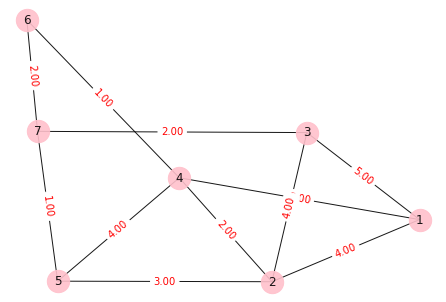

Obliczanie dolnego ograniczenia t:
t_low1 = max(
) = 0
t_low2 = max(
     t1+4=0+4,
) = 4
t_low3 = max(
     t1+5=0+5,
     t2+4=4+4,
) = 8
t_low4 = max(
     t1+3=0+3,
     t2+2=4+2,
) = 6
t_low5 = max(
     t2+3=4+3,
     t4+4=6+4,
) = 10
t_low6 = max(
     t4+1=6+1,
) = 7
t_low7 = max(
     t3+2=8+2,
     t5+1=10+1,
     t6+2=7+2,
) = 11
['1:0', '2:4', '3:8', '4:6', '5:10', '6:7', '7:11']
Obliczanie rórnego ograniczenia t:
t_up7 = max(
) = 11
t_up6 = max(
     t7+2=11-2,
) = 9
t_up5 = max(
     t7+1=11-1,
) = 10
t_up4 = max(
     t5+4=10-4,
     t6+1=9-1,
) = 6
t_up3 = max(
     t7+2=11-2,
) = 9
t_up2 = max(
     t3+4=9-4,
     t4+2=6-2,
     t5+3=10-3,
) = 4
t_up1 = max(
     t2+4=4-4,
     t3+5=9-5,
     t4+3=6-3,
) = 0
['1:0', '2:4', '3:9', '4:6', '5:10', '6:9', '7:11']
rezerwa:(1, 2):0, (1, 3):4, (1, 4):3, (2, 3):1, (2, 4):0, (2, 5):3, (3, 7):1, (4, 5):0, (4, 6):2, (5, 7):0, (6, 7):2, 
['luzy: 1:0', 'luzy: 2:0', 'luzy: 3:1', 'luzy: 4:0', 'luzy: 5:0', 'luzy: 6:2', 'luzy: 7:0']
cr

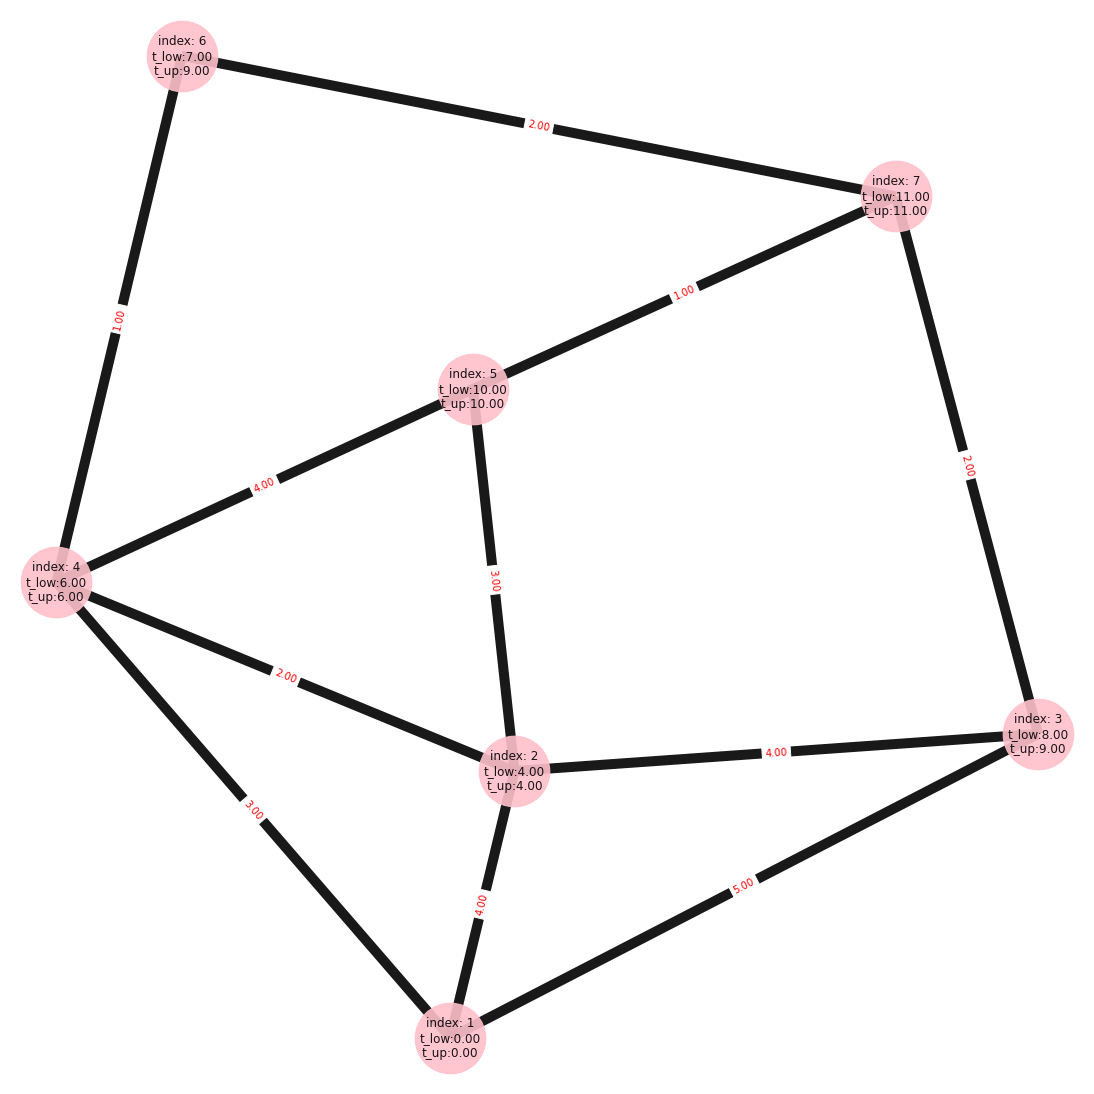

[(0, 1), (1, 3), (3, 4), (4, 6)]

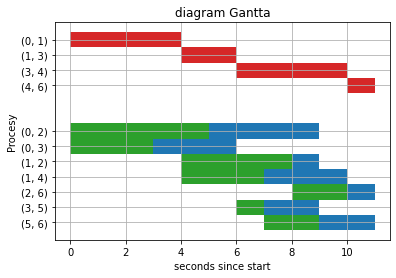

In [31]:
M =np.array([
    [0,4,5,3,0,0,0],
    [0,0,4,2,3,0,0],
    [0,0,0,0,0,0,2],
    [0,0,0,0,4,1,0],
    [0,0,0,0,0,0,1],
    [0,0,0,0,0,0,2],
    [0,0,0,0,0,0,0]
    
])
call_CMP(M)

### Perth

Problem startowy:


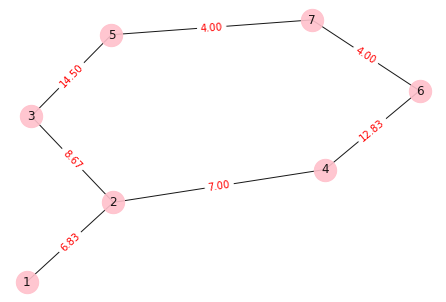

Obliczanie dolnego ograniczenia t:
t_low1 = max(
) = 0
t_low2 = max(
     t1+6.833333333333333=0+6.833333333333333,
) = 6.833333333333333
t_low3 = max(
     t2+8.666666666666666=6.833333333333333+8.666666666666666,
) = 15.5
t_low4 = max(
     t2+7.0=6.833333333333333+7.0,
) = 13.833333333333332
t_low5 = max(
     t3+14.5=15.5+14.5,
) = 30.0
t_low6 = max(
     t4+12.833333333333334=13.833333333333332+12.833333333333334,
) = 26.666666666666664
t_low7 = max(
     t5+4.0=30.0+4.0,
     t6+4.0=26.666666666666664+4.0,
) = 34.0
['1:0', '2:6.833333333333333', '3:15.5', '4:13.833333333333332', '5:30.0', '6:26.666666666666664', '7:34.0']
Obliczanie rórnego ograniczenia t:
t_up7 = max(
) = 34.0
t_up6 = max(
     t7+4.0=34.0-4.0,
) = 30.0
t_up5 = max(
     t7+4.0=34.0-4.0,
) = 30.0
t_up4 = max(
     t6+12.833333333333334=30.0-12.833333333333334,
) = 17.166666666666664
t_up3 = max(
     t5+14.5=30.0-14.5,
) = 15.5
t_up2 = max(
     t3+8.666666666666666=15.5-8.666666666666666,
     t4+7.0=17.1666666

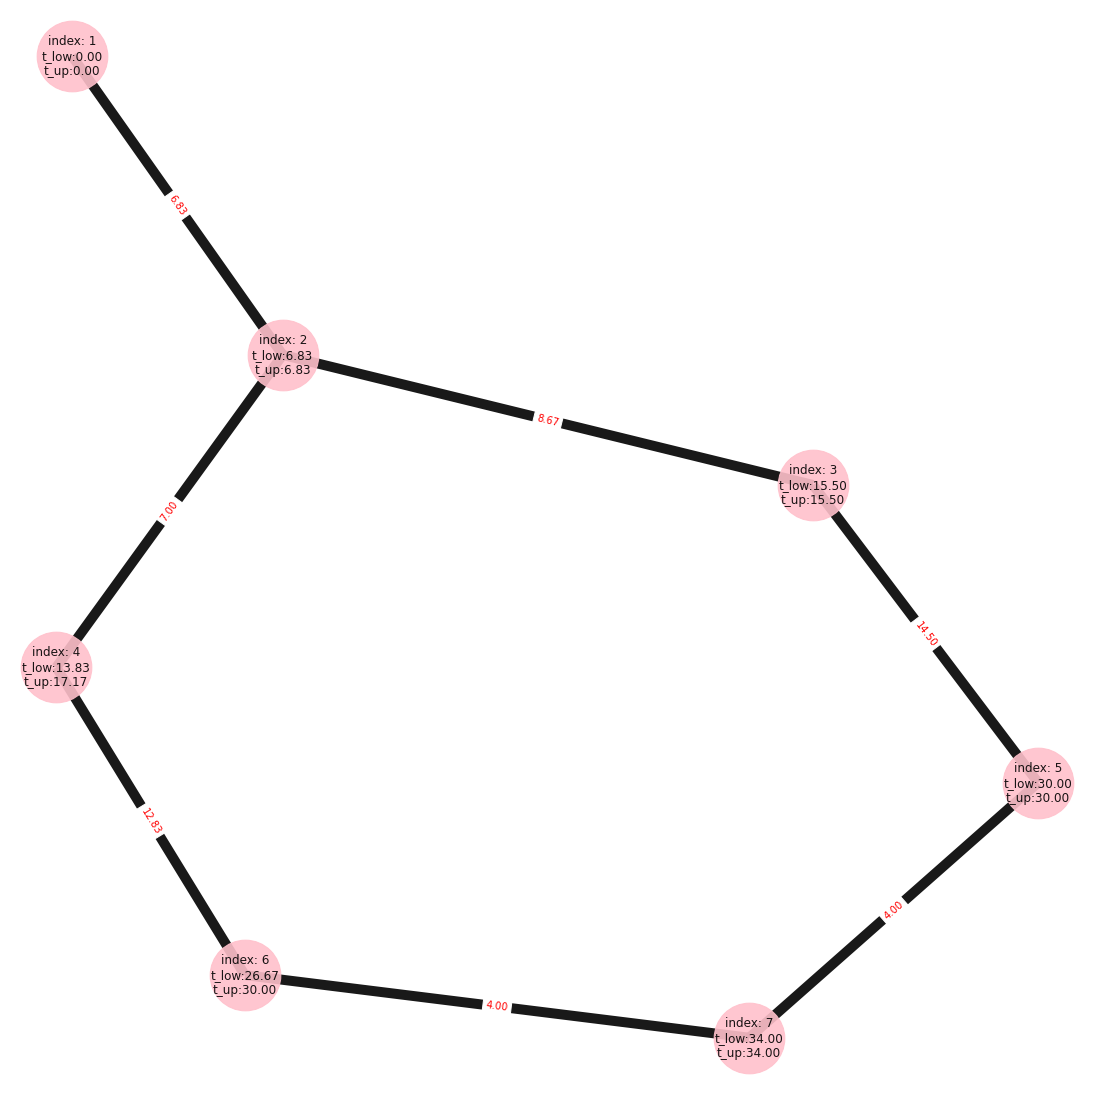

Variance: 3.166666666666667
[(0, 1), (1, 2), (2, 4), (4, 6)]
[(0, 1), (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6)]


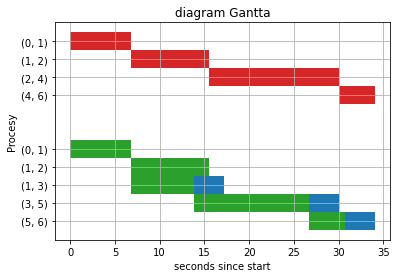

In [32]:
perth_dict = {1:{'before':[None],'a':2,'b':9,'m':4},
             2:{'before':[1],'a':5,'b':4,'m':8},
             3:{'before':[2],'a':4,'b':8,'m':10},
             4:{'before':[2],'a':4,'b':10,'m':7},
             5:{'before':[3],'a':11,'b':20,'m':14},
             6:{'before':[4],'a':9,'b':16,'m':13},
             7:{'before':[5,6],'a':2,'b':6,'m':4}}
def estimation (a,b,m):
    return (a+4*m+b)/6,(b-a)/6
def reduce_to_CPM(D):
    M = np.zeros((len(D),len(D)))
    step_variance = {}
    for V,data in D.items():
        for before in data['before']:
            if before is not None:
                p , v = estimation(data['a'],data['b'],data['m'])
                M[before-1,V-1] = p
                step_variance[(before-1,V-1)] = v**2
    return M, step_variance
    return M
def perth(D):
    M,v = reduce_to_CPM(D)
    cmp = call_CMP(M)
    variance = 0
    for point in cmp:
        variance+=v[point]
    print('Variance:',variance)
    print(cmp)
    print([k for k in v.keys()])
#reduce_to_CPM(perth_dict)
perth(perth_dict)

### Johnson


In [33]:
M = np.array([[4,1,4,5,3],[2,3,4,6,2]])
order_1 = []
order_2 = []
for i in range(M.shape[1]):
    if M[0,i]<M[1,i]:
        order_1.append((i,M[0,i]))
    else :
        order_2.append((i,M[1,i]))
order = sorted(order_1,key = lambda x: x[1])
order.extend(sorted(order_2,key = lambda x: x[1],reverse = True))
solution  = np.zeros((3,5))
first = 0
second = 0
for i in range(len(order)):
    job = order[i][0]
    first+=M[0,job]
    if second<=first:
        second=first+M[1,job]
    else:
        second+=M[1,job]
    solution[:,i] = [job+1, first,second]
  
    
solution

array([[ 2.,  4.,  3.,  1.,  5.],
       [ 1.,  6., 10., 14., 17.],
       [ 4., 12., 16., 18., 20.]])

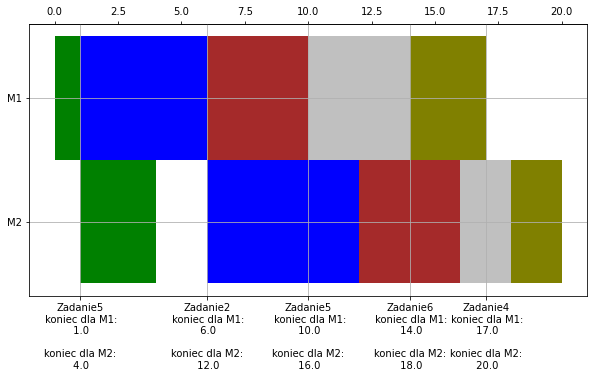

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

colors = ['green','blue','brown','silver','olive']
xticks = []
for i in range(solution.shape[1]):
    before_1 = solution[1,i-1] if i-1>=0 else 0
    after_1 = solution[1,i]-before_1
    if i>0:
        before_2 = solution[1,i] if solution[1,i]>=solution[2,i-1] else solution[2,i-1]
    else:
        before_2 = solution[1,i]
    after_2 = solution[2,i]-before_2
    ax.broken_barh([(before_1, after_1)], (1, 2), facecolors =(colors[i]));
    
    ax.broken_barh([(before_2, after_2)], (-1, 2), facecolors =(colors[i]));
    xticks.append(solution[1,i])
plt.yticks([2,-0],['M1','M2']);
plt.xticks(xticks,[f'Zadanie{M[0,i]+1}\n koniec dla M1:\n {solution[1,i]}\n\nkoniec dla M2:\n {solution[2,i]}' for i in range(solution.shape[1])]);
ax.secondary_xaxis('top')
ax.grid(True)

### Ford Fulkerson

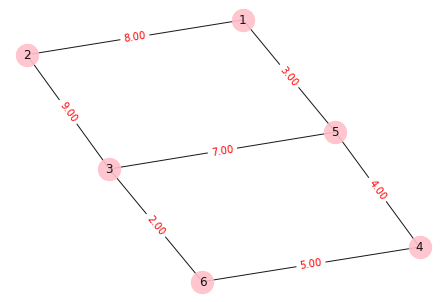

f1 = f0+Cf(p) = 0 + 2


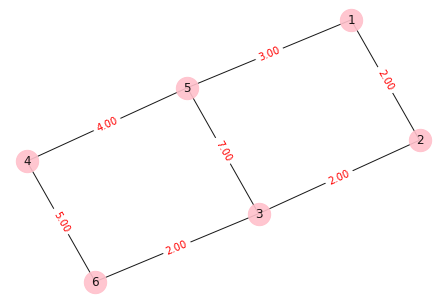

f4 = f3+Cf(p) = 2 + 3


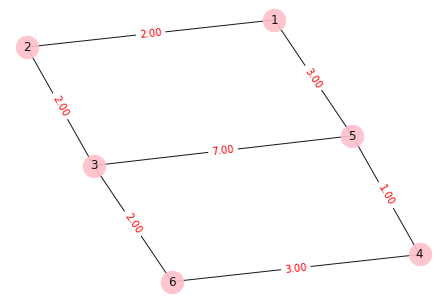

f7 = f6+Cf(p) = 5 + 1


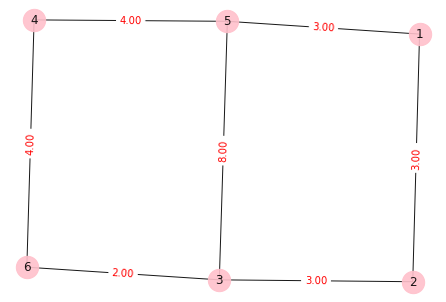

Max Flow: 6 


In [35]:
# Ford-Fulkerson algorith in Python

from collections import defaultdict


class Graph:

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)


    # Using BFS as a searching algorithm 
    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True
        
        while queue:

            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    # Applying fordfulkerson algorithm
    def ford_fulkerson(self, source, sink):
        
        
        
        parent = [-1] * (self.ROW)
        max_flow = 0
        iteration=0
        while self.searching_algo_BFS(source, sink, parent):
            M = self.graph
            edges = []
            for i, row in enumerate(M):
                for j,col in enumerate(row):
                    if col>0:
                        edges.append([i+1,j+1])

            
            G = nx.Graph()
            G.add_edges_from(edges)
            pos = nx.spring_layout(G)
            plt.figure()    
            nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
            node_size=500,node_color='pink',alpha=0.9,\
            labels={node:node for node in G.nodes()})
            nx.draw_networkx_edge_labels(G,pos,edge_labels={tuple(e):f'{M[e[0]-1][e[1]-1]:0.2f}' for e in edges},font_color='red')
            plt.axis('off')
            plt.show()
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]
            
            # Adding the path flows
            print(f'f{1+iteration} = f{iteration}+Cf(p) = {max_flow} + {path_flow}')
            max_flow += path_flow

            # Updating the residual values of edges
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
                iteration+=1
        M = self.graph
        edges = []
        for i, row in enumerate(M):
            for j,col in enumerate(row):
                if col>0:
                    edges.append([i+1,j+1])


        G = nx.Graph()
        G.add_edges_from(edges)
        pos = nx.spring_layout(G)
        plt.figure()    
        nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
        node_size=500,node_color='pink',alpha=0.9,\
        labels={node:node for node in G.nodes()})
        nx.draw_networkx_edge_labels(G,pos,edge_labels={tuple(e):f'{M[e[0]-1][e[1]-1]:0.2f}' for e in edges},font_color='red')
        plt.axis('off')
        plt.show()
        return max_flow


graph = [[0, 8, 0, 0, 3, 0],
         [0, 0, 9, 0, 0, 0],
         [0, 0, 0, 0, 7, 2],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 7, 4, 0, 0],
         [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0
sink = 5

print("Max Flow: %d " % g.ford_fulkerson(source, sink))

Twierdzenie  [O maksymalnym przepływie i minimalnym przekroju]

Jeśli f jest przepływem w sieci przepływowej G = (V, E) ze źródłem s i ujściem t, wówczas następujące warunki są równoważne:
* f jest maksymalnym przepływem w G.
* Sieć rezydualna G_f nie zawiera żadnych ścieżek powiększających.
* |f| = c(S, T) dla pewnego przekroju (S, T) w G.

 ### Floyd Warshall

In [36]:
# Floyd Warshall Algorithm in python


# The number of vertices
nV = 4

INF = np.inf


# Algorithm implementation
def floyd_warshall(G):
    distance = list(map(lambda i: list(map(lambda j: j, i)), G))
    M = np.full((len(G), len(G)), np.inf)  
    # Adding vertices individually
    for k in range(nV):
        for i in range(nV):
            for j in range(nV):
                if distance[i][k] + distance[k][j]<distance[i][j]:
                    M[i,j]=k+1
                distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])
        print(f"d{k}\n----------------")
        print(G)
        print(f"\n----------------")
    print(G)
    print(f"\n----------------")
    print(f"\n poprawy")
    print(M)


# Printing the solution
def print_solution(distance):
    for i in range(nV):
        for j in range(nV):
            if(distance[i][j] == INF):
                print("INF", end=" ")
            else:
                print(distance[i][j], end="  ")
        print(" ")


G =     np.array([[0, -1, INF, -1],
         [2, 0, 0, -1],
         [INF, 1, 0, -2],
         [4, 3, 2, 0]])
floyd_warshall(G)

d0
----------------
[[ 0. -1. inf -1.]
 [ 2.  0.  0. -1.]
 [inf  1.  0. -2.]
 [ 4.  3.  2.  0.]]

----------------
d1
----------------
[[ 0. -1. inf -1.]
 [ 2.  0.  0. -1.]
 [inf  1.  0. -2.]
 [ 4.  3.  2.  0.]]

----------------
d2
----------------
[[ 0. -1. inf -1.]
 [ 2.  0.  0. -1.]
 [inf  1.  0. -2.]
 [ 4.  3.  2.  0.]]

----------------
d3
----------------
[[ 0. -1. inf -1.]
 [ 2.  0.  0. -1.]
 [inf  1.  0. -2.]
 [ 4.  3.  2.  0.]]

----------------
[[ 0. -1. inf -1.]
 [ 2.  0.  0. -1.]
 [inf  1.  0. -2.]
 [ 4.  3.  2.  0.]]

----------------

 poprawy
[[inf inf  2.  3.]
 [inf inf inf  3.]
 [ 4. inf inf inf]
 [inf inf inf inf]]


## Węgierski

In [37]:
def independent_zeros(G_hat):
    G = deepcopy(G_hat)
    for i in range(len(G)):
        for j in range(len(G)):
            if G[i,j]==0:
                for ii,same_row_col in enumerate(G[i,:]):
                    if same_row_col==0:
                        if 0 in G[:,ii]:
                            G[i,:] = [999 for i in range(len(G))]
                            G[i,j]=0
                        else:
                            G[i,:] = [999 for i in range(len(G))]
                            G[i,ii]=0 
                for jj,same_col_row in enumerate(G[:,j]):
                    if same_col_row==0:
                        if 0 in G[jj,:]:
                            G[:,j] = [999 for i in range(len(G))]
                            G[i,j]=0
                        else:
                            G[:,j] = [999 for i in range(len(G))]
                            G[jj,j]=0 
                        
   
    ind_zeros = np.argwhere(G==0)
    rows  = set([i[0] for i in ind_zeros])
    cols = set([i[1] for i in ind_zeros])
    
    return ind_zeros,rows,cols
def retry(G, independent_zeros):
    reduction_matri = deepcopy(G)
    cols = []
    rows = []
    for zero in independent_zeros:
        if reduction_matri[zero[0],zero[1]] ==0:
            if 0 in reduction_matri[zero[0],:zero[1]] or 0 in reduction_matri[zero[0],zero[1]+1:] :
                rows.append(zero[0]) 
                reduction_matri[zero[0],:] = [999 for i in range(len(reduction_matri))]
            else:
                rows.append(zero[0]) 
                reduction_matri[zero[0],:] = [999 for i in range(len(reduction_matri))]
            if 0 in reduction_matri[:zero[0],zero[1]] or 0 in reduction_matri[zero[0]+1:,zero[1]]:
                    cols.append(zero[1])
                    reduction_matri[:,zero[1]] = [999 for i in range(len(reduction_matri))]
        
    print(f'Covered rows: {rows},Covered Columns: {cols}')
    uncovered=[]
    for i in range(len(G)):
        for j in range(len(G)):
    
            if i not in list(rows) and j not in list(cols):
                uncovered.append(G[i,j])

    
    value = min(uncovered) if uncovered else 0
    print('Smallest uncovered: ',value)
    for i in range(len(G)):
        for j in range(len(G)):
            
            if i in list(rows) and j in list(cols):
                G[i,j]+=value
            if i not in list(rows) and j not in list(cols):
                G[i,j]-=value
    
            
    return value
def reduce(G):
    print(G)
    phi = 0
    for i, row in enumerate(G):
        minima = min(row)
        phi+= minima
        for j,col in enumerate(row):
            G[i,j]-=minima
    for i in range(len(G)):
        minima = min(G[:,i])
        phi+= minima
        for j,row in enumerate(G[:,i]):
            G[j,i]-=minima
    print('_____________After reduction______________\n',G)
    
    return phi
from copy import deepcopy
def hungarian(G):
    cost = 0
    G_start = deepcopy(G)
    phi = 0
    phi +=reduce(G)
    ind_zeros,rows,cols = independent_zeros(G)
    print(f"Independent Zeros:\n{ind_zeros}\n--------------------")
    print("Phi: ",phi)
    while len(ind_zeros) < len(G):
        print('_________retry_____________:\n')
        phi+=retry(G, ind_zeros)
        
        print(G,'\n---------------')
        ind_zeros,rows,cols = independent_zeros(G)
        print(f"Independent Zeros:\n{ind_zeros}\n--------------------")
        print("Phi: ",phi)
    cost+=sum([G_start[zero[0],zero[1]] for zero in ind_zeros])
    print("Phi: ",phi)
    print(f"Independent Zeros:\n{ind_zeros}\n")
    print(f"Values:\n {[G_start[zero[0],zero[1]] for zero in ind_zeros]}")
    print("Cost: ", cost)
    return phi,cost,ind_zeros,G

In [42]:

G =     np.array([[np.inf, 3, 2, 5,9,4],
                 [1, np.inf, 3,6,7, 9],
                 [6, 2,np.inf,5,4,9],
                 [9,7,6,np.inf,6,4],
                 [7,4,5,3,np.inf,7],
                 [6,5,3,4,1,np.inf]])
hungarian(G)
G[0,2] = np.inf
G[3,5] =np.inf
hungarian(G)

[[inf  3.  2.  5.  9.  4.]
 [ 1. inf  3.  6.  7.  9.]
 [ 6.  2. inf  5.  4.  9.]
 [ 9.  7.  6. inf  6.  4.]
 [ 7.  4.  5.  3. inf  7.]
 [ 6.  5.  3.  4.  1. inf]]
_____________After reduction______________
 [[inf  1.  0.  3.  7.  2.]
 [ 0. inf  2.  5.  6.  8.]
 [ 4.  0. inf  3.  2.  7.]
 [ 5.  3.  2. inf  2.  0.]
 [ 4.  1.  2.  0. inf  4.]
 [ 5.  4.  2.  3.  0. inf]]
Independent Zeros:
[[0 2]
 [1 0]
 [2 1]
 [3 5]
 [4 3]
 [5 4]]
--------------------
Phi:  13.0
Phi:  13.0
Independent Zeros:
[[0 2]
 [1 0]
 [2 1]
 [3 5]
 [4 3]
 [5 4]]

Values:
 [2.0, 1.0, 2.0, 4.0, 3.0, 1.0]
Cost:  13.0
[[inf  1. inf  3.  7.  2.]
 [ 0. inf  2.  5.  6.  8.]
 [ 4.  0. inf  3.  2.  7.]
 [ 5.  3.  2. inf  2. inf]
 [ 4.  1.  2.  0. inf  4.]
 [ 5.  4.  2.  3.  0. inf]]
_____________After reduction______________
 [[inf  0. inf  2.  6.  0.]
 [ 0. inf  2.  5.  6.  7.]
 [ 4.  0. inf  3.  2.  6.]
 [ 3.  1.  0. inf  0. inf]
 [ 4.  1.  2.  0. inf  3.]
 [ 5.  4.  2.  3.  0. inf]]
Independent Zeros:
[[0 1]
 [1 0]
 [3 2]


(6.0,
 4.0,
 array([[0, 5],
        [1, 0],
        [2, 1],
        [3, 2],
        [4, 3],
        [5, 4]]),
 array([[inf,  2., inf,  2.,  6.,  0.],
        [ 0., inf,  2.,  5.,  6.,  7.],
        [ 2.,  0., inf,  1.,  0.,  4.],
        [ 3.,  3.,  0., inf,  0., inf],
        [ 4.,  3.,  2.,  0., inf,  3.],
        [ 5.,  6.,  2.,  3.,  0., inf]]))

### Zagadnienie transportowe - pnocno zachodni


In [19]:
weights = np.array([[3,5,6],
           [4,1,6],
           [7,3,4]])
demand = np.array([20,40,90])
supply = np.array([50,70,30])
solution = np.full((len(demand),len(supply)), None)
minimum = min([demand[0],supply[0]])
for i in range(len(demand)):
    for j in range(len(supply)):
        if solution[i,j] is None:
            take = min(supply[i],demand[j])
            if demand[j]>=supply[i]:
                solution[i,j+1:] = [0 for x in range(len(demand[j+1:]))]
            else:
                solution[i+1:,j] = [0 for x in range(len(supply[i+1:]))]
            supply[i]-=take
            demand[j]-=take
            solution[i,j]=take
            print(f'Demand={demand}')
            print(f'Supply={supply}')
            print(solution)
#distribution = [[x[0],x[1]] for x in
distr = np.where(solution!=0)
distribution = [x for x in zip(distr[0],distr[1])]
cost = sum([solution[x[0],x[1]]*weights[x[0],x[1]] for x in distribution])
z = f'z='
for x in distribution:
    z+=f'{weights[x[0],x[1]]}*x{x[0]}{x[1]}+'
print(z[:-1])
for idx,x in enumerate(distribution):
    print(f'Decyzja{idx}:\n Supply:{x[0]}, Demand:{x[1]}')
print('Koszt',cost)

Demand=[ 0 40 90]
Supply=[30 70 30]
[[20 None None]
 [0 None None]
 [0 None None]]
Demand=[ 0 10 90]
Supply=[ 0 70 30]
[[20 30 0]
 [0 None None]
 [0 None None]]
Demand=[ 0  0 90]
Supply=[ 0 60 30]
[[20 30 0]
 [0 10 None]
 [0 0 None]]
Demand=[ 0  0 30]
Supply=[ 0  0 30]
[[20 30 0]
 [0 10 60]
 [0 0 None]]
Demand=[0 0 0]
Supply=[0 0 0]
[[20 30 0]
 [0 10 60]
 [0 0 30]]
z=3*x00+5*x01+1*x11+6*x12+4*x22
Decyzja0:
 Supply:0, Demand:0
Decyzja1:
 Supply:0, Demand:1
Decyzja2:
 Supply:1, Demand:1
Decyzja3:
 Supply:1, Demand:2
Decyzja4:
 Supply:2, Demand:2
Koszt 700


### Simplex



In [72]:
import pandas as pd
def print_step(constraints,b,cb,zj,cj,cost):
    to_print =['cb','cj ']
    to_print.extend(cjj)
    to_print.append('|  b')
    #print(f'cb   cj  {np.array(cjj)}  b')
    to_print = [to_print,['  ', 'baza']]
    to_print[1].extend([i for i in range(constraints.shape[1])])
    to_print[1].extend('| ')
    #print(f'   baza  {[i for i in range(constraints.shape[1])]}  ')
    for i in range(len(constraints)):
        to_print2=[f' { cb[i] } |',f' {cj[i]} |']
        to_print2.extend(constraints[i])
        to_print2.append(f'|  {b[i]} ')
        #print(f'{cb[i]}   {cj[i]}   {constraints[i]}   {b[i]}')
        to_print.append(to_print2)
    #print(f'   zj   {zj}   {cost}')
    to_print2 = ['  ', 'zj  ']
    to_print2.extend(zj)
    to_print2.append(f'|{cost}')
    to_print.append(to_print2)
    to_print2 = [' ', 'zj-cj']
    to_print2.extend(simplex_idx)
    to_print2.append('max')
    to_print.append(to_print2)
    #print(f'  zj-cj   {simplex_idx}   max')
    for row in to_print:
        print(row)
constraints = np.array([[1,2,1,1,0,0],
                        [1,1,1,0,1,0],
                        [0,1,2,0,0,1]])
b = np.array([5,4,1])
cb = np.array([0, 0, 0])
zj = cb@constraints
simplex_idx = np.array([1,3,2,0,0,0])
cjj = simplex_idx
cj = np.where(simplex_idx==0)[0]
cost = cb@b.T

while len(simplex_idx[simplex_idx>0])>0:
    to_base  = np.argmax(simplex_idx)
    
    to_remove = np.argmin(b/constraints[:,to_base])
    
    cb[to_remove] = simplex_idx[to_base]
    cj[to_remove] = to_base
    for i in range(len(constraints)):
        if i!= to_remove:
            ind = constraints[i,to_base]
            constraints[i,:]-=constraints[to_remove,:]*ind
            b[i]-=b[to_remove]*ind
        else:
            ind  = constraints[i,to_base]
            constraints[i,:]=constraints[to_remove,:]*ind
            b[i] = b[i]*ind
    zj = cb@constraints
    cost = cb@b.T
    simplex_idx =cjj - zj
    print('-------------')
    print_step(constraints,b,cb,zj,cj,cost)



-------------
['cb', 'cj ', 1, 3, 2, 0, 0, 0, '|  b']
['  ', 'baza', 0, 1, 2, 3, 4, 5, '|', ' ']
[' 0 |', ' 3 |', 1, 0, -3, 1, 0, -2, '|  3 ']
[' 0 |', ' 4 |', 1, 0, -1, 0, 1, -1, '|  3 ']
[' 3 |', ' 1 |', 0, 1, 2, 0, 0, 1, '|  1 ']
['  ', 'zj  ', 0, 3, 6, 0, 0, 3, '|3']
[' ', 'zj-cj', 1, 0, -4, 0, 0, -3, 'max']
-------------
['cb', 'cj ', 1, 3, 2, 0, 0, 0, '|  b']
['  ', 'baza', 0, 1, 2, 3, 4, 5, '|', ' ']
[' 1 |', ' 0 |', 1, 0, -3, 1, 0, -2, '|  3 ']
[' 0 |', ' 4 |', 0, 0, 2, -1, 1, 1, '|  0 ']
[' 3 |', ' 1 |', 0, 1, 2, 0, 0, 1, '|  1 ']
['  ', 'zj  ', 1, 3, 3, 1, 0, 1, '|6']
[' ', 'zj-cj', 0, 0, -1, -1, 0, -1, 'max']


<ipython-input-72-0d198147346e>:43: RuntimeWarning: divide by zero encountered in true_divide
  to_remove = np.argmin(b/constraints[:,to_base])


In [ ]:

#